<h3>Name : Hossein Yahayaei </h3>
<h3>U-ID : 99222119</h3>
<h3>Course : Digital Image Processing </h3>

In [1]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Quastion 1

In [2]:
img2 = cv.imread("img2.jpg")

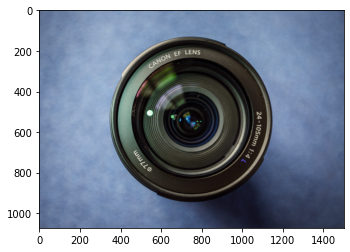

In [3]:
plt.imshow(img2)
# cv.imshow("iamg", img2)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [4]:
blured = cv.GaussianBlur(img2, (51,51), 1, borderType=cv.BORDER_DEFAULT)

### In this part i tried to :
##### First convert image to gray scal then i smoothed that grat scaled image in a way that do not lose edges of the image by using bilateral filter in open cv 
##### Second i used adaptive thresholding to extract edges of gray scal image and the used median bluring to blur and having well difened edges in the picture 
##### And at the end i bolded the edges in the original image and made other parts smoother 

In [5]:
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray = cv.bilateralFilter(gray, 9, 75, 75)
thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 9, 2)
thresh = cv.medianBlur(thresh, 3)
cartoon = cv.bitwise_and(img2, img2, mask=thresh)

In [6]:
# plt.imshow(cartoon)
cv.imshow("Original Image", img2)
cv.imshow("Cartoonized Image", cartoon)
cv.waitKey(0)
cv.destroyAllWindows()

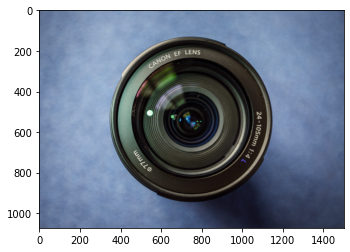

In [105]:
plt.imshow(img2)

# Quastion 2

Creating base functions like calculating MSE and adding noise to an image incase of any use in upcoming codes

In [2]:
def MSE(original_img, noisy_img):
    mse = np.mean((original_img - noisy_img) ** 2)
    return mse

def PSNR(original_img, noisy_img, l=255):
    psnr = 10*np.log10((l**2)/MSE(original_img, noisy_img))
    return psnr

def add_noise(Original_img, mean, std):
    nois = np.zeros(Original_img.shape, np.int32)
    cv.randn(nois, mean, std)
    noisy_img = cv.add(Original_img, nois, dtype=cv.CV_8UC3)
    return noisy_img

Importing all 3 images

In [3]:
baboon = cv.imread("baboon.bmp")
lena = cv.imread("lena.tif")
caman = cv.imread("caman.tif")

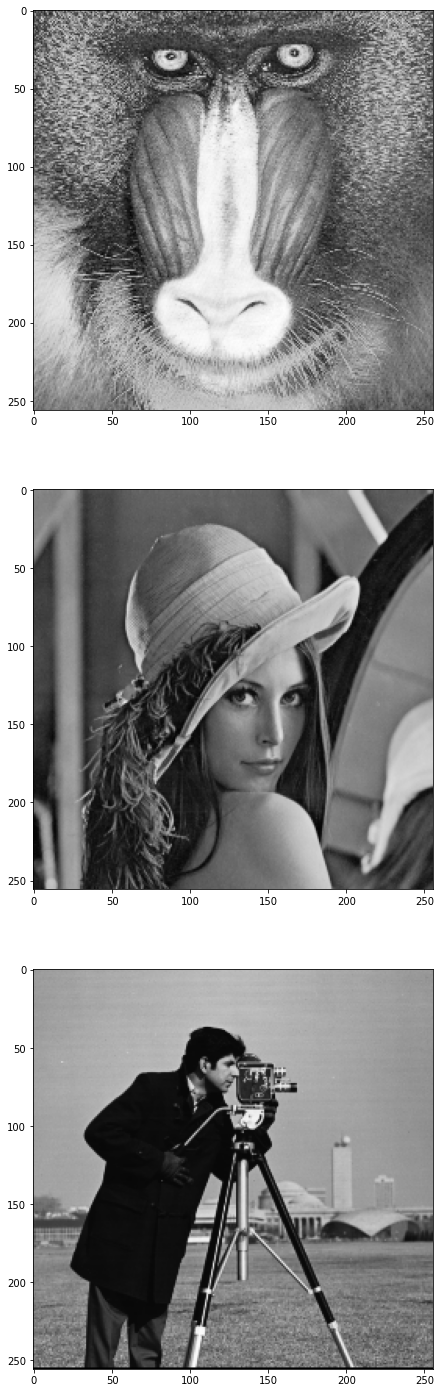

In [4]:
fig, axes = plt.subplots(3,1)
fig.set(figheight=25, figwidth=10)
axes[0].imshow(baboon)
axes[1].imshow(lena)
axes[2].imshow(caman)

Crearing list of noisy images to working on  by applying noise with mean zero and standard deviation 10 up to 50 

In [5]:
noisy_lenas = [add_noise(lena, 0, i*10) for i in range(1,6)]
noisy_baboon = [add_noise(baboon, 0, i*10) for i in range(1,6)]
noisy_caman = [add_noise(caman, 0, i*10) for i in range(1,6)]

In this part i calculated the MSE of orogianl image and noisy pictures with out smoothing them as we can see its quite low but in upcoming conclusion we'll see as we are more smoothing the image more the MSE increases

In [6]:
lena_MSE = [MSE(lena, noisy_lenas[i]) for i in range(5)]
baboon_MSE = [MSE(baboon, noisy_baboon[i]) for i in range(5)]
caman_MSE = [MSE(caman, noisy_caman[i]) for i in range(5)]

In [7]:
print("LANA Image:")
[print(f"The original MSE of Lana image with gaussian noise with mean 0 and sigma {(i+1)*10} is {mse}") for i, mse in enumerate(lena_MSE)]
print("BABOON Image:")
[print(f"The original MSE of Baboon image with gaussian noise with mean 0 and sigma {(i+1)*10} is {mse}") for i, mse in enumerate(baboon_MSE)]
print("CAMERA MAN Image:")
[print(f"The original MSE of Camera man image with gaussian noise with mean 0 and sigma {(i+1)*10} is {mse}") for i, mse in enumerate(caman_MSE)]

LANA Image:
The original MSE of Lana image with gaussian noise with mean 0 and sigma 10 is 20.174769083658855
The original MSE of Lana image with gaussian noise with mean 0 and sigma 20 is 29.297144571940105
The original MSE of Lana image with gaussian noise with mean 0 and sigma 30 is 32.44599405924479
The original MSE of Lana image with gaussian noise with mean 0 and sigma 40 is 34.134012858072914
The original MSE of Lana image with gaussian noise with mean 0 and sigma 50 is 34.67215474446615
BABOON Image:
The original MSE of Baboon image with gaussian noise with mean 0 and sigma 10 is 20.296178181966145
The original MSE of Baboon image with gaussian noise with mean 0 and sigma 20 is 29.103866577148438
The original MSE of Baboon image with gaussian noise with mean 0 and sigma 30 is 32.61627197265625
The original MSE of Baboon image with gaussian noise with mean 0 and sigma 40 is 34.05363972981771
The original MSE of Baboon image with gaussian noise with mean 0 and sigma 50 is 34.9746

[None, None, None, None, None]

In below code i wrote a function that can find the best kernel size for different gaussian smoothing method and their different sigmas and then applied that gaussian smoothing method on noisy images and then calculated their MSE then ploted them 

In [50]:
def closest_odd_number(i):
    x = 6*((i+1)*2)
    if x % 2 == 0:
        return x - 1
    else:
        return x

def mse_analysis(noisy_img, original_img, eval_func, rang=20):
    fig, axes = plt.subplots(len(noisy_img))
    fig.set(figwidth=10, figheight=25)
    
    for j, image in enumerate(noisy_img):
        smoothed_evals = []
        sigma = []
        for i in range(rang):
            smoothed = cv.GaussianBlur(image, (closest_odd_number(i), closest_odd_number(i)), (i+1)*2)
            loss = eval_func(original_img, smoothed)

            sigma.append((i+1)*2)
            smoothed_evals.append(loss)

        axes[j].plot(sigma, smoothed_evals)
        axes[j].set_title(f"Evaluation results of gaussian smoothing for image with gaussain noise with standard deviation {(j+1)*10} and mean 0")

For Lena image what i did is to analysis all 5 noisy pics based on MSE first and then used PSNR second all at once by checking range of sigma values from 2 up to 80 to see what will happen to their MSE base on the function i wrote 
<p>Based on what i see from plots its abvious that larger the sigma is so larger the MSE will be but as we know the only thing MSE checks is two picture being close to each other geometricaly not their patterns so we need some evaluation function that can evaluat pattern closeness of two picures instead of measuring Euclidean distance of two pictures But in other hand as we increase sigma PSNR turns to decrease but from some point in sigma it wont make any change . In below plots we can see both result of MSE and PSNR for noisy images of lena when the image has gaussian noise with different variances as i indicated on their plots.</p>
<p>In this part based on the formula we had for best choice of kernel size by having specifice sigma i used different gaussian smoothing filters so we can say kernel sizes i used in this part are best kernel size for their specifice sigma </p>


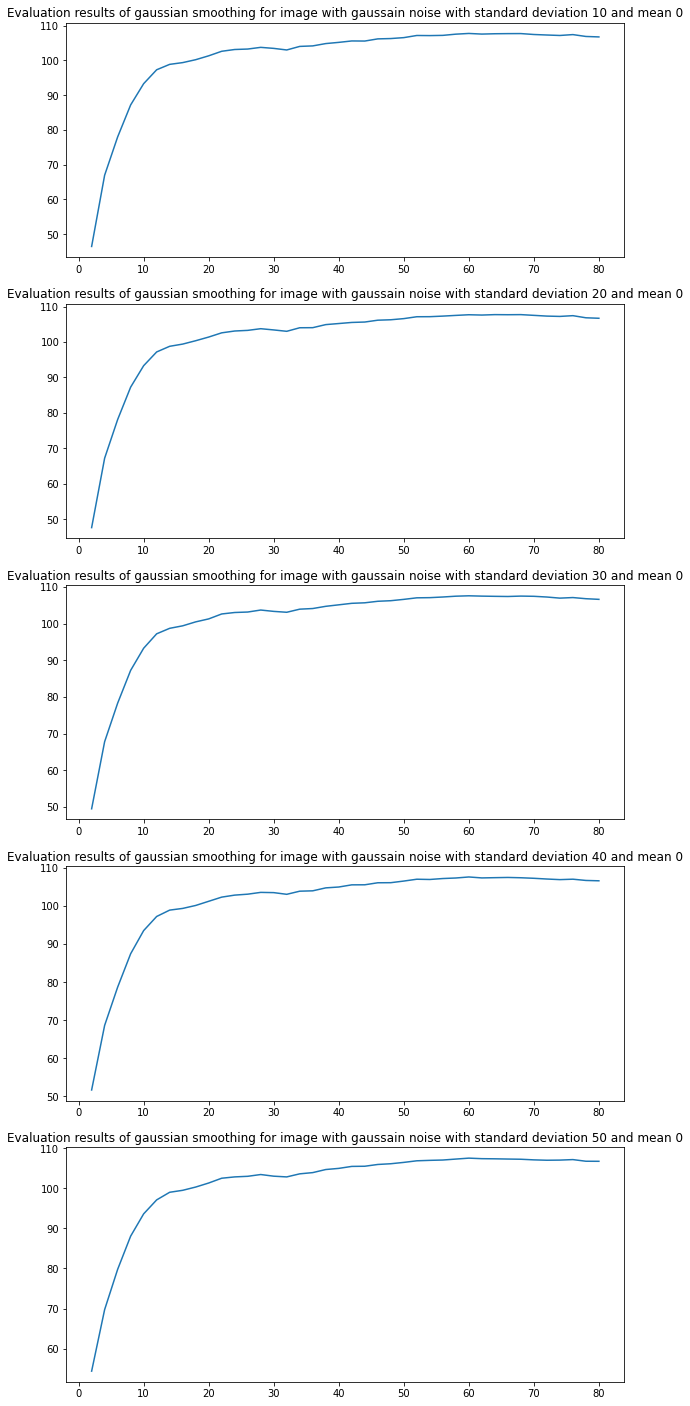

In [51]:
mse_analysis(noisy_lenas, lena, MSE, 40)

This is the result of denoised images of lena by using PSNR evaluation function 

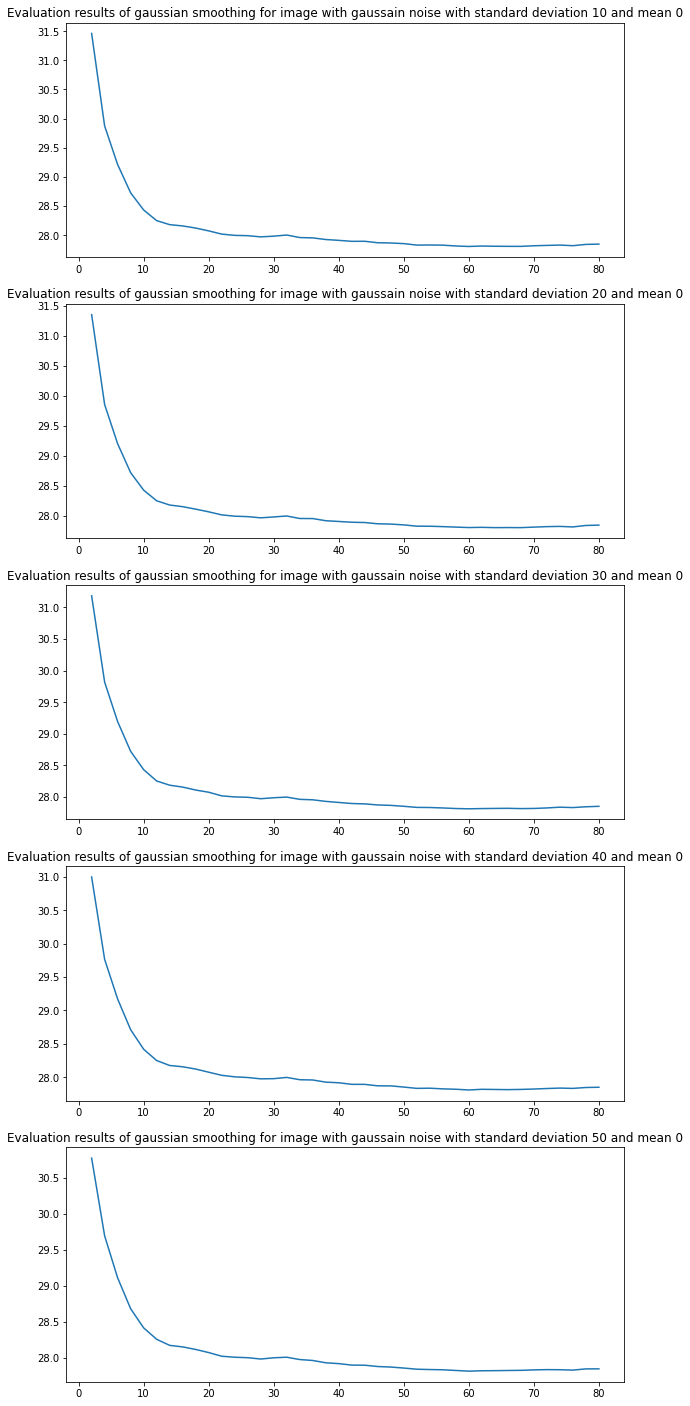

In [55]:
mse_analysis(noisy_lenas, lena, PSNR, 40)

For Baboon image what i did is to analysis all 5 noisy pics all at once by checking range of sigma values from 2 up to 80 to see what will happen to their MSE base on the function i wrote . just like what i did previously and the result and my conclusion is same as what i wrote befor .

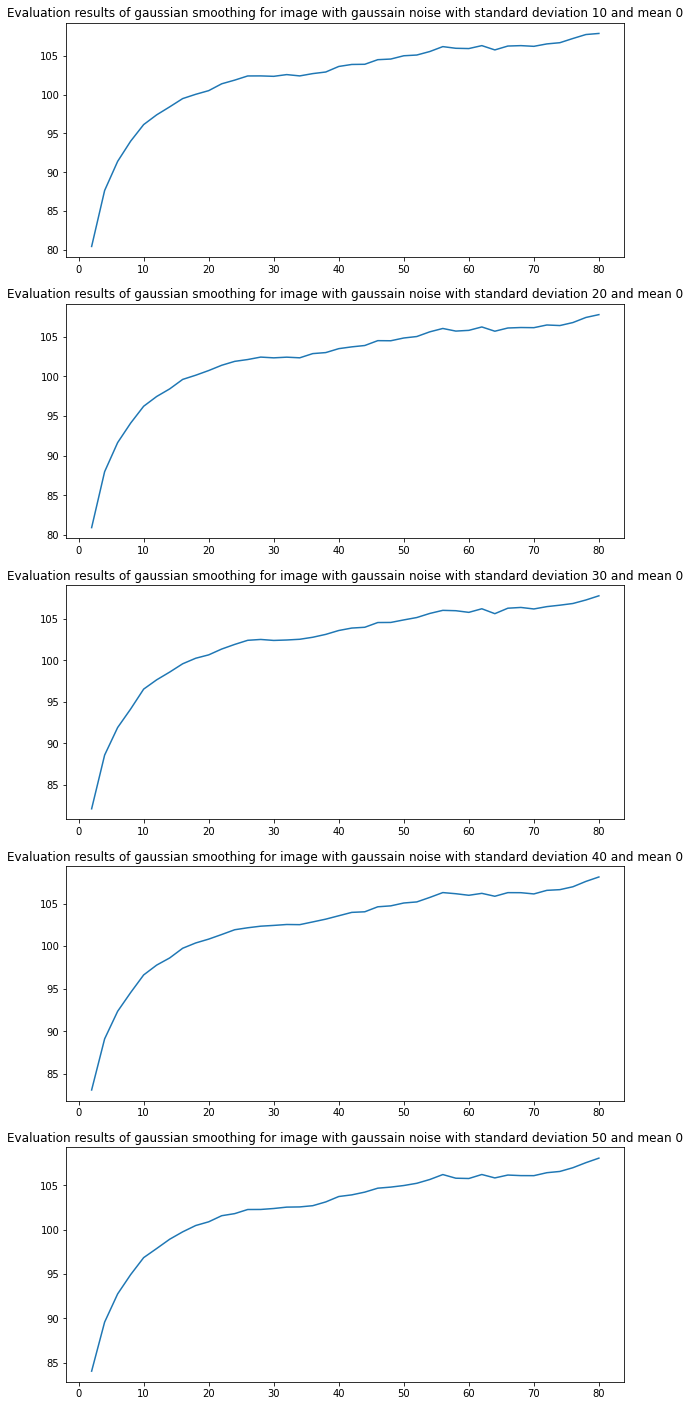

In [56]:
mse_analysis(noisy_baboon, baboon, MSE, 40)

This is the result of denoised images of Baboon by using PSNR evaluation function 

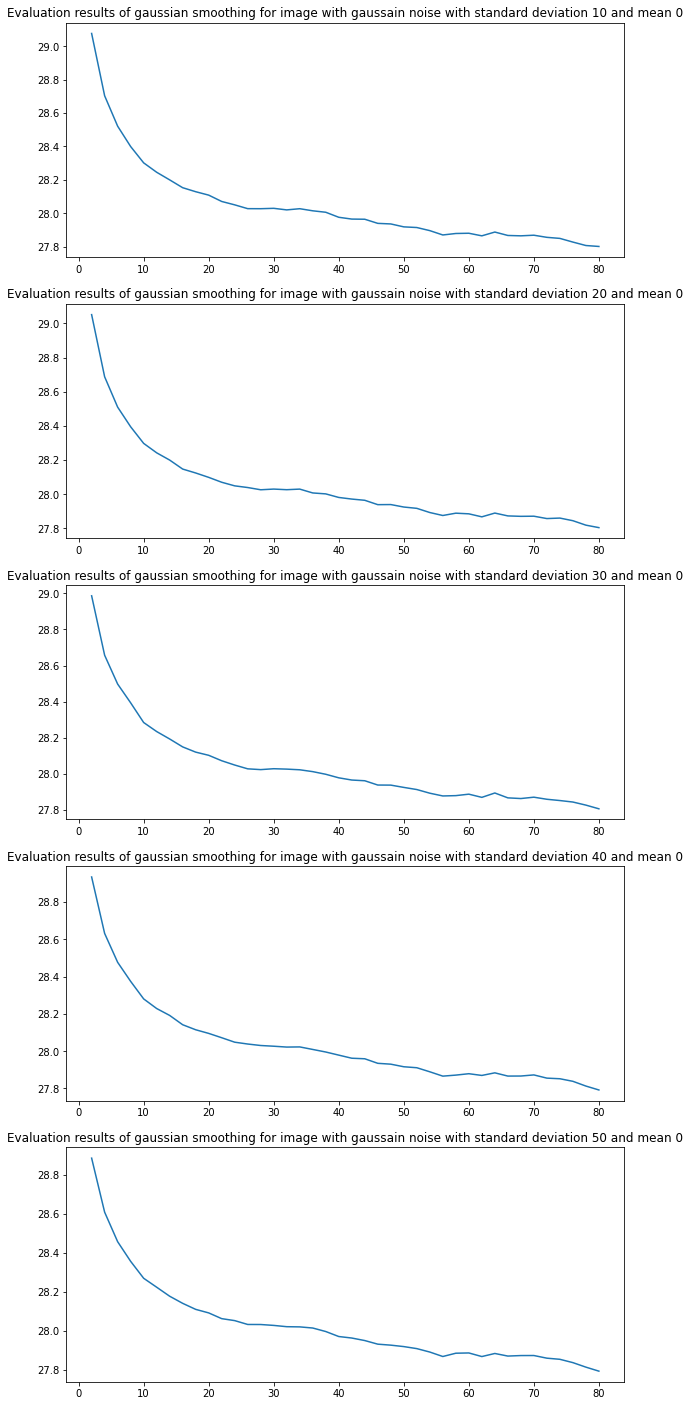

In [57]:
mse_analysis(noisy_baboon, baboon, PSNR, 40)

For Camera man image what i did is to analysis all 5 noisy pics all at once by checking range of sigma values from 2 up to 80 to see what will happen to their MSE base on the function i wrote 
 just like what i did previously and the result and my conclusion is same as what i wrote befor .

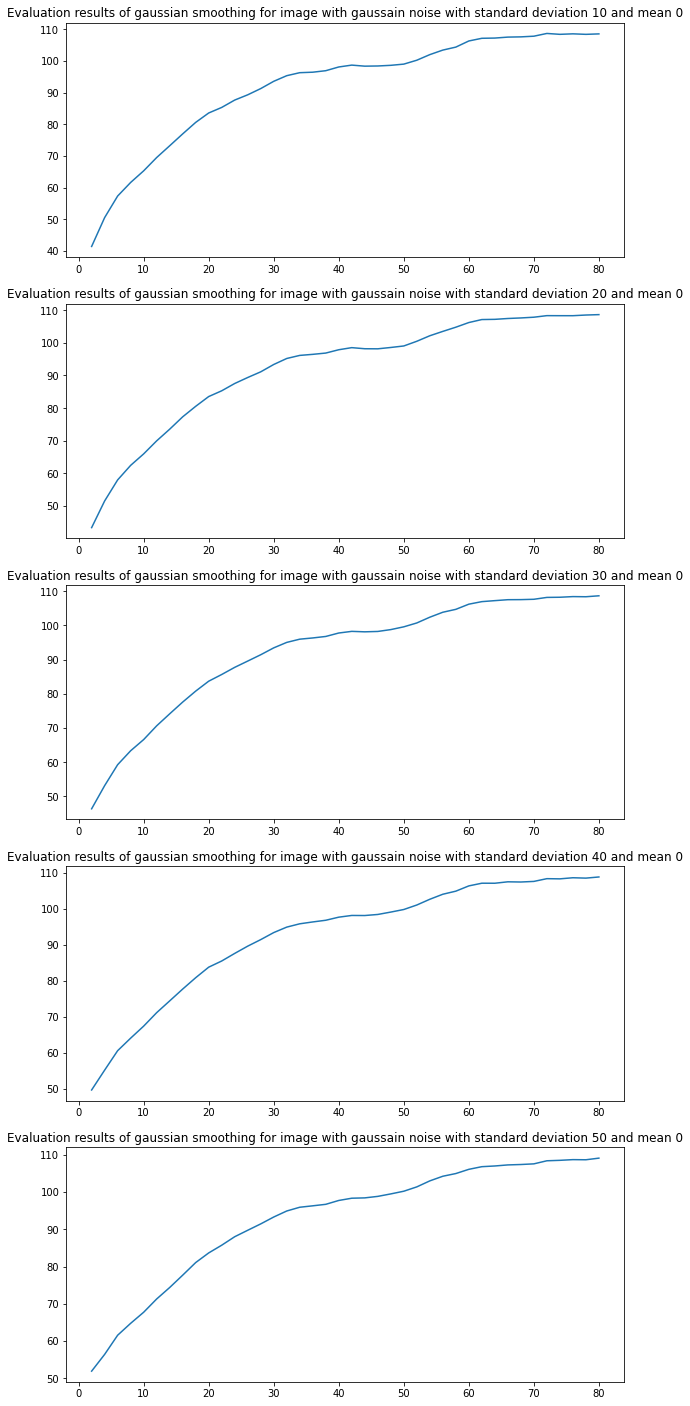

In [58]:
mse_analysis(noisy_caman, caman, MSE, 40)

This is the result of denoised images of camera man by using PSNR evaluation function 

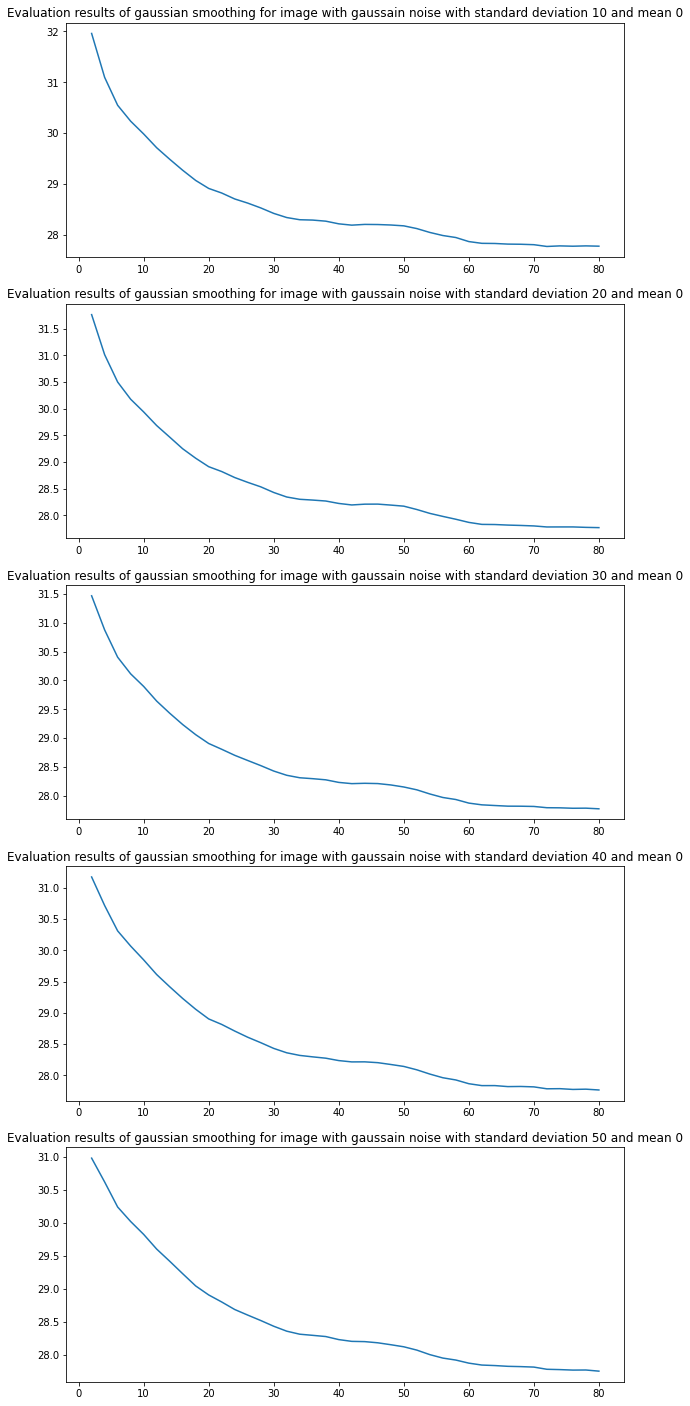

In [59]:
mse_analysis(noisy_caman, caman, PSNR, 40)

Based on these plots best sigma value to smooth pictures is depend on how much information loss are we allowed to have So i cant choose specific and exact number for gaussian smoothing sigma .